# **SEATTLE PETS ANALYSIS**

## DATA FETCH

DATASET IS FETCHED FROM KAGGLE (https://www.kaggle.com/aaronschlegel/seattle-pet-licenses/data). ITS FREE TO USE.

In [10]:
import pandas as pd
# Import label encoder 
from sklearn import preprocessing 


In [11]:
df = pd.read_csv("seattle_pet_licenses.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66042 entries, 0 to 66041
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   animal_s_name       64685 non-null  object 
 1   license_issue_date  66042 non-null  object 
 2   license_number      43885 non-null  float64
 3   primary_breed       66042 non-null  object 
 4   secondary_breed     22538 non-null  object 
 5   species             66042 non-null  object 
 6   zip_code            65884 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.5+ MB


## PRE PROCESSING OF COLUMNS

In [12]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11337 entries, 1 to 64945
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   animal_s_name       11337 non-null  object 
 1   license_issue_date  11337 non-null  object 
 2   license_number      11337 non-null  float64
 3   primary_breed       11337 non-null  object 
 4   secondary_breed     11337 non-null  object 
 5   species             11337 non-null  object 
 6   zip_code            11337 non-null  object 
dtypes: float64(1), object(6)
memory usage: 708.6+ KB


THE CSV FILE OR DATASET HAS 7 COLUMNS AND 11337 ROWS. COLUMNS ARE SELF DESCRIPTIVE.

### PREPROCESSING OF ZIPCODE

In [13]:
df['zip_code'].value_counts()

98115    1034
98103     972
98117     914
98125     681
98118     642
         ... 
98193       1
9810        1
89122       1
95115       1
99203       1
Name: zip_code, Length: 79, dtype: int64

In [14]:
df= df[df['zip_code']!=" "] 
df.shape

(11302, 7)

In [15]:
 df[df['zip_code']==" "].head 
#no more null values in zip_code

<bound method NDFrame.head of Empty DataFrame
Columns: [animal_s_name, license_issue_date, license_number, primary_breed, secondary_breed, species, zip_code]
Index: []>

In [16]:
df[df['zip_code']=="98115"].groupby("species").count()

,animal_s_name,license_issue_date,license_number,primary_breed,secondary_breed,zip_code
species,,,,,,
Cat,109,109,109,109,109,109
Dog,925,925,925,925,925,925


**Thus there are 109 Cats in area having zipcode 98115 and 925 dogs. Thus dogs are more popular in the area where licensed registrations is the highest. and total of 10,253 dogs are registered and 1049 cats**




In [17]:
df.groupby("species").count()

,animal_s_name,license_issue_date,license_number,primary_breed,secondary_breed,zip_code
species,,,,,,
Cat,1049,1049,1049,1049,1049,1049
Dog,10253,10253,10253,10253,10253,10253


SINCE MODELS ONLY  UNDERSTAND THE NUMERIC DATA, WE NEED TO CHANGE IT  TO NUMERIC FROM STRING

In [18]:
# label_encoder object knows how to understand word labels. 
le_pin = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['zip_code']= le_pin.fit_transform(df['zip_code'])
df['zip_code'].head()

1     23
2     34
3     19
9     22
10    49
Name: zip_code, dtype: int64

### PREPROCESSING OF SPECIES

In [19]:
df['species'].value_counts()

Dog    10253
Cat     1049
Name: species, dtype: int64

In [20]:

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['species']= label_encoder.fit_transform(df['species'])
df['species'].head()

1     1
2     1
3     0
9     1
10    1
Name: species, dtype: int64

All the pets are either DOGS or CATS... STRINGS ARE CONVERTED TO NUMERIC FORMAT

### PREPROCESSING OF SECONDARY_BREED AND PRIMARY_BREED TO NUMERIC

In [21]:
df['secondary_breed'].value_counts()

Mix                              3446
Poodle, Standard                  843
Poodle, Miniature                 741
Retriever, Labrador               639
Terrier                           305
                                 ... 
Birman                              1
Griffon Vendeen, Grand Basset       1
Norwegian Elkhound                  1
Bouvier des Flandres                1
Spaniel, American Water             1
Name: secondary_breed, Length: 185, dtype: int64

In [22]:
# label_encoder object knows how to understand word labels. 
le_2 = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['secondary_breed']= le_2.fit_transform(df['secondary_breed'])
df['secondary_breed'].head()

1     170
2     118
3      90
9     137
10     90
Name: secondary_breed, dtype: int64

In [23]:
df['primary_breed'].value_counts()

Retriever, Labrador      2114
Chihuahua, Short Coat     591
Retriever, Golden         588
Terrier                   471
Border Collie             364
                         ... 
Chartreux                   1
Mexican Hairless            1
Neapolitan Mastiff          1
Kai Ken                     1
Terrier, Pit Bull           1
Name: primary_breed, Length: 204, dtype: int64

In [24]:
# label_encoder object knows how to understand word labels. 
le_1 = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['primary_breed']= le_1.fit_transform(df['primary_breed'])
df['primary_breed'].head()

1     147
2     136
3     102
9     152
10    137
Name: primary_breed, dtype: int64

204 types of primary breed pets have been licensed.


**PREPROCESSING OF ANIMAL'S NAMES**

In [25]:
df['animal_s_name'].value_counts()

Lucy       124
Charlie     88
Bella       81
Molly       71
Buddy       70
          ... 
Yin          1
Pikachu      1
Una May      1
Tam          1
Columbo      1
Name: animal_s_name, Length: 4227, dtype: int64

*Lucy is most popular name for pets
Charlie is 2nd most popular, followed by Bella*


PREPROCESSING OF LICENSE_ISSUE_DATE

In [26]:
df['license_issue_date'].value_counts()

2016-11-01T00:00:00.000    103
2016-10-18T00:00:00.000     95
2015-03-04T00:00:00.000     88
2015-07-21T00:00:00.000     88
2015-04-07T00:00:00.000     82
                          ... 
2015-05-24T00:00:00.000      1
2014-08-02T00:00:00.000      1
2015-03-15T00:00:00.000      1
2014-04-15T00:00:00.000      1
2014-04-09T00:00:00.000      1
Name: license_issue_date, Length: 887, dtype: int64

*01ST NOVEMBER 2016 records the highest number of registration - 103
followed by 18th OCTOBER 2016 -95*

### PREPROCESSING OF LICENSE_NUMBER

In [27]:
df['license_number'].value_counts()

903498.0    3
904464.0    3
958946.0    3
955953.0    3
959840.0    3
           ..
359302.0    1
961165.0    1
961161.0    1
895624.0    1
77824.0     1
Name: license_number, Length: 10925, dtype: int64

one license number is issued to many pets... not accurate

In [28]:
df.shape

(11302, 7)

In [29]:
df[df['license_number']==904464] #CHECKING

,animal_s_name,license_issue_date,license_number,primary_breed,secondary_breed,species,zip_code
3753,Buddy,2014-11-19T00:00:00.000,904464.0,127,126,1,46
64806,Buddy,2016-12-20T00:00:00.000,904464.0,127,126,1,46
64807,Buddy,2016-12-20T00:00:00.000,904464.0,127,126,1,46


In [30]:
df.drop_duplicates(subset=['license_number', 'license_issue_date'], inplace=True, keep="first")
df.shape

(11194, 7)

In [31]:
df[df['license_number']==904464]
#CHECKING SUCCESSFUL

,animal_s_name,license_issue_date,license_number,primary_breed,secondary_breed,species,zip_code
3753,Buddy,2014-11-19T00:00:00.000,904464.0,127,126,1,46
64806,Buddy,2016-12-20T00:00:00.000,904464.0,127,126,1,46


hence duplicate rows have been deleted.. *Now the pets having same license number are the renewed license .. thus repeating..*
Preprocessing of license_number is completed.

**PreProcessing of data is completed.**


In [32]:
print(df.head())
print(df.shape)
df.info()

   animal_s_name       license_issue_date  ...  species  zip_code
1           Jack  2009-12-23T00:00:00.000  ...        1        23
2         Ginger  2006-01-20T00:00:00.000  ...        1        34
3         Pepper  2006-02-07T00:00:00.000  ...        0        19
9        Sampson  2008-01-31T00:00:00.000  ...        1        22
10         Buddy  2008-03-20T00:00:00.000  ...        1        49

[5 rows x 7 columns]
(11194, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11194 entries, 1 to 64945
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   animal_s_name       11194 non-null  object 
 1   license_issue_date  11194 non-null  object 
 2   license_number      11194 non-null  float64
 3   primary_breed       11194 non-null  int64  
 4   secondary_breed     11194 non-null  int64  
 5   species             11194 non-null  int64  
 6   zip_code            11194 non-null  int64  
dtypes: float64(1), in

## SPLITTING OF DATA AND TRAING ML MODEL 

In [33]:
df_copy= df
#X=df[['zip_code']]
X=df_copy.drop(axis=1, labels=['animal_s_name', 'license_issue_date', 'license_number', 'zip_code', 'species'])
y=df['species']

In [34]:
X.head()

,primary_breed,secondary_breed
1,147,170
2,136,118
3,102,90
9,152,137
10,137,90


**DECISION TREE**

In [35]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [36]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7) # 70% training and 30% test


In [37]:
X_train.shape

(7835, 2)

In [38]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [39]:
#evaluation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9958320928847871


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


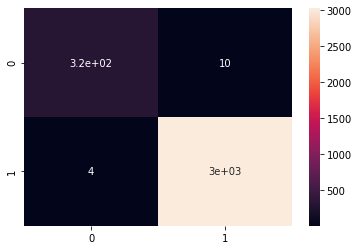

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['primary_breed', 'secondary_breed'],class_names=['CAT','DOG'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Classification.png')
Image(graph.create_png())

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


**KNN CLASSIFER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X,y)

#Predict the response for test dataset
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cm, annot=True)

In [ ]:
#visualizing
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt


# Plotting decision region
plot_decision_regions(X.to_numpy(), y.to_numpy(), clf=model, legend=2)
# Adding axes annotations
plt.xlabel('breed')
plt.ylabel('cat or dog')
plt.title('Knn visualization' )
plt.show()

**RANDOM FOREST CLASSIFIERS**

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cm, annot=True)

# CONCLUSION
Now based on the pin code you can know that what types of pets are more in your neighborhood. Also using the machine learning models we could 99% accurately classified the cats and dogs based on the breed type.